In [1]:
%load_ext autoreload
%autoreload 2
from etr.auto_import import *
from etr.data.data_loader import load_data

## Data

In [2]:
trade = pd.concat([
    load_data(["2025-05-01", "2025-05-19"], table="MarketTrade", venue="*", symbol="BTCJPY"),
    load_data(["2025-05-01", "2025-05-19"], table="MarketTrade", venue="*", symbol="XBTUSD"),
])
trade["term_amount"] = trade.amount * trade.price / 1e6
trade["latency"] = (trade["timestamp"] - trade.market_created_timestamp).dt.total_seconds() * 1e3

2025-05-20 13:37:00.994|INFO    |etr.data.data_loader: data_loader.load_data 85|Found 75 HDB files, process loading...
100%|██████████| 75/75 [00:00<00:00, 87.77it/s]
2025-05-20 13:37:02.247|INFO    |etr.data.data_loader: data_loader.load_data 85|Found 19 HDB files, process loading...
100%|██████████| 19/19 [00:00<00:00, 34.87it/s]


In [3]:
rate = pd.concat([
    load_data(["2025-05-01", "2025-05-19"], table="Rate", venue="*", symbol="USDJPY"),
    load_data(["2025-05-01", "2025-05-19"], table="Rate", venue="*", symbol="BTCJPY"),
    load_data(["2025-05-01", "2025-05-19"], table="Rate", venue="*", symbol="XBTUSD"),
])

2025-05-20 13:37:03.312|INFO    |etr.data.data_loader: data_loader.load_data 85|Found 17 HDB files, process loading...
100%|██████████| 17/17 [00:01<00:00, 14.87it/s]
2025-05-20 13:37:04.911|INFO    |etr.data.data_loader: data_loader.load_data 85|Found 75 HDB files, process loading...
100%|██████████| 75/75 [00:03<00:00, 20.58it/s]
2025-05-20 13:37:09.975|INFO    |etr.data.data_loader: data_loader.load_data 85|Found 19 HDB files, process loading...
100%|██████████| 19/19 [00:01<00:00, 10.60it/s]


In [4]:
rate.head(3)

,timestamp,market_created_timestamp,sym,venue,category,best_bid,best_ask,mid_price,misc,universal_id
0,2025-05-01 00:00:00.024862+00:00,2025-05-01 00:00:00.015000+00:00,USDJPY,gmo,websocket,142.978,143.066,143.022,OPEN,c1442b47e96640b5b7db36b1766d8ced
1,2025-05-01 00:00:00.325752+00:00,2025-05-01 00:00:00.317000+00:00,USDJPY,gmo,websocket,142.976,143.064,143.020,OPEN,bcf973f009da4426b55240942ecea07c
2,2025-05-01 00:00:00.627216+00:00,2025-05-01 00:00:00.618000+00:00,USDJPY,gmo,websocket,142.978,143.066,143.022,OPEN,54407e33cd77421a95d9f5aa7fb730ff


In [5]:
trade.head(3)

,timestamp,market_created_timestamp,sym,venue,category,side,price,amount,trade_id,order_ids,misc,universal_id,term_amount,latency
0,2025-05-01 00:00:07.491455+00:00,2025-05-01 00:00:07.431000+00:00,BTCJPY,bitflyer,json-rpc,-1,13500227.0,0.003020,2595104564,JRF20250430-235943-011342_JRF20250501-000007-0...,None,5ea5937d109249a1ae0c5135efe29132,0.040777,60.455
1,2025-05-01 00:00:07.766648+00:00,2025-05-01 00:00:07.701000+00:00,BTCJPY,bitflyer,json-rpc,-1,13500227.0,0.006980,2595104565,JRF20250430-235943-011342_JRF20250501-000007-0...,None,cd6ce955036746359bbd26680ed52f80,0.094225,65.648
2,2025-05-01 00:00:07.767034+00:00,2025-05-01 00:00:07.701000+00:00,BTCJPY,bitflyer,json-rpc,-1,13500224.0,0.027426,2595104566,JRF20250430-235921-015298_JRF20250501-000007-0...,None,aac080fda0304eeca963121985e8614b,0.370256,66.034


---

### best spread

In [6]:
rate["spread"] = (rate.best_ask - rate.best_bid) / rate.mid_price * 1e4

In [7]:
rate.groupby(["venue", "sym"]).spread.describe().sort_values("mean")

count      mean        std           min       25%  \
venue     sym                                                              
coincheck BTCJPY   441349.0  0.392816   1.521243    -21.462884 -0.325058   
bitmex    XBTUSD  4495853.0  0.625523   0.601972      0.009334  0.154292   
bitbank   BTCJPY   177613.0  0.813014   1.212306    -22.150935  0.000730   
gmo       USDJPY  3714040.0  1.120808   2.173977      0.134546  0.137540   
          BTCJPY  2272815.0  2.536290   1.063266      0.000647  1.772744   
bitflyer  BTCJPY  5484975.0  4.063765  40.122129 -20000.000000  3.059926   

                       50%       75%        max  
venue     sym                                    
coincheck BTCJPY  0.515221  1.383730  94.960852  
bitmex    XBTUSD  0.517055  0.916853  46.767905  
bitbank   BTCJPY  0.328903  1.256149  47.178358  
gmo       USDJPY  0.139079  0.280057   7.913913  
          BTCJPY  2.474957  3.226135  36.052163  
bitflyer  BTCJPY  4.080017  5.148535  36.183200

In [9]:
rate.groupby(["venue", "sym", rate.timestamp.dt.hour]).spread.median().unstack(level=[0, 1]).style.bar()

In [10]:
v = trade.set_index("market_created_timestamp").groupby(["venue", "sym"]).resample("10min").amount.sum().unstack(level=[0, 1])
c = trade.set_index("market_created_timestamp").groupby(["venue", "sym"]).resample("10min").amount.count().unstack(level=[0, 1])

In [11]:
display(
    "Volume",
    v.describe().T,
    "Count",
    c.describe().T,
)

'Volume'

,,count,mean,std,min,25%,50%,75%,max
venue,sym,,,,,,,,
bitbank,BTCJPY,2736.0,1.440148,2.091364,0.000000,0.285550,0.730100,1.699675,25.414300
bitflyer,BTCJPY,2736.0,5.513244,6.806019,0.000000,1.481926,3.248335,7.033411,117.096104
bitmex,XBTUSD,2736.0,26.065249,34.438565,0.104278,9.837107,15.946772,27.584983,431.858256
coincheck,BTCJPY,2501.0,4.626255,4.950992,0.012680,1.645080,3.184451,6.172123,77.257520
gmo,BTCJPY,2652.0,2.899695,3.495874,0.000000,1.055000,1.923500,3.343250,67.019000


'Count'

,,count,mean,std,min,25%,50%,75%,max
venue,sym,,,,,,,,
bitbank,BTCJPY,2736.0,73.436404,72.056044,0.0,30.0,54.0,93.0,1030.0
bitflyer,BTCJPY,2736.0,209.590278,183.047447,0.0,88.0,157.0,277.0,2702.0
bitmex,XBTUSD,2736.0,472.050804,459.238183,16.0,218.0,337.0,550.0,5189.0
coincheck,BTCJPY,2501.0,217.855658,226.306013,4.0,84.0,156.0,281.0,4126.0
gmo,BTCJPY,2652.0,201.838235,200.731968,0.0,98.0,154.0,242.0,3761.0


---

### Deviation

preprocessing

In [43]:
# best price
best = rate.set_index("timestamp").groupby(["venue", "sym"])[["best_bid", "best_ask"]].resample("5s").last().unstack(level=[0, 1])
best = best.swaplevel(0, -1, axis=1).swaplevel(0, 1, axis=1).ffill()

In [13]:
# traded price
tprice = trade.set_index("market_created_timestamp").groupby(["venue", "sym"]).price.resample("5s", label="right").last().unstack(level=[0, 1])

In [25]:
# exec price
exec_price = trade.set_index("market_created_timestamp").shift(freq="-100ms").groupby(["venue", "sym", "side"]).price.resample("5s").agg(["min", "max"])
exec_price = exec_price.unstack(level=[0, 1, 2]).swaplevel(0, -1, axis=1)
sell = exec_price.loc[:, ix[-1, :, :, "min"]][-1]
sell.columns = ["sell_"+"_".join(c[:1]) for c in sell.columns]

buy = exec_price.loc[:, ix[1, :, :, "max"]][1]
buy.columns = ["buy_"+"_".join(c[:1]) for c in buy.columns]
exec_price = buy.join(sell)

In [26]:
# mid prices
mid = rate.set_index(["timestamp"]).groupby(["venue", "sym"]).mid_price.resample("5s", label="right").last().unstack(level=[0, 1]).ffill()
mid[("bitmex", "XBTJPY")] = mid.bitmex.XBTUSD * mid.gmo.USDJPY
mid = mid.drop([("gmo", "USDJPY"), ("bitmex", "XBTUSD")], axis=1)
mid.columns = mid.columns.get_level_values(0)
mid = mid.mask(mid.div(mid.rolling("10min").mean()).sub(1).abs().ge(0.03), np.nan).ffill()

In [27]:
# deviation -- from globa mid
global_mid = mid.mean(axis=1).to_frame("mid")
dev = mid.div(global_mid.values).sub(1).mul(1e4)
dev.describe().T

,count,mean,std,min,25%,50%,75%,max
venue,,,,,,,,
bitbank,328320.0,7.502478,6.371497,-17.152302,3.541424,8.463793,11.892999,72.660360
bitflyer,328320.0,4.836099,4.070755,-261.649957,2.268033,4.354468,7.360085,30.453572
coincheck,300106.0,7.845519,5.106503,-25.697380,4.553444,7.690439,10.897125,81.805990
gmo,318157.0,-4.191382,5.762978,-20.956002,-8.079806,-4.367435,-0.810683,63.155598
bitmex,328320.0,-15.448255,7.278506,-51.237968,-20.718577,-16.235644,-10.223773,46.016686


In [28]:
# deviation MA
freq = "10min"
dev_ma = dev.rolling(freq).mean()
dev_smooth = dev - dev_ma
dev_smooth.describe().T

,count,mean,std,min,25%,50%,75%,max
venue,,,,,,,,
bitbank,328320.0,-0.002727,2.376620,-14.805798,-1.530529,-0.020708,1.503463,64.934541
bitflyer,328320.0,-0.000289,2.134126,-265.086100,-0.728604,-0.008345,0.728829,32.204414
coincheck,300106.0,-0.000925,1.364133,-21.983442,-0.800271,-0.006485,0.796487,69.113988
gmo,318157.0,0.000497,1.589919,-38.992167,-0.876920,0.005114,0.889694,65.205419
bitmex,328320.0,0.002794,1.590447,-22.160600,-0.910227,0.001388,0.908172,66.238927


In [29]:
# 10min return
theta = dev_smooth.abs().quantile(q=0.95)
sig = (dev_smooth.abs() > theta).mul(np.sign(dev_smooth)).stack().to_frame("signal").query("signal != 0").mul(-1)
display(
    theta.to_frame().T,
    sig.join(mid.shift(-12*10).div(mid).sub(1).mul(1e4).stack().to_frame("ret_10min")).groupby(["venue", "signal"]).ret_10min.describe()
)

venue,bitbank,bitflyer,coincheck,gmo,bitmex
0.95,4.644421,2.423677,2.499708,2.749651,2.898171


count      mean        std         min        25%  \
venue     signal                                                       
bitbank   -1.0    8479.0 -4.599810  17.092091 -100.956263 -12.717995   
           1.0    7937.0  5.490912  17.363744  -69.303289  -2.166015   
bitflyer  -1.0    8359.0 -1.516689  18.891372 -327.243455 -11.044688   
           1.0    8057.0  3.082512  25.097277 -129.488533  -7.325315   
bitmex    -1.0    8041.0 -1.287943  22.315203 -112.667200 -12.565714   
           1.0    8375.0  2.716277  20.785964 -110.931612  -8.747825   
coincheck -1.0    7577.0 -1.401587  17.855712  -82.023206 -10.617347   
           1.0    7426.0  2.917662  19.769884 -103.149999  -5.906423   
gmo       -1.0    8105.0  0.147402  18.036171  -97.265530  -7.802498   
           1.0    7803.0  1.213743  19.002781  -95.555695  -7.642756   

                       50%        75%         max  
venue     signal                                   
bitbank   -1.0   -5.336903   2.995745  120.695074  
           1.0    4.476122  13.717197  128.883066  
bitflyer  -1.0   -1.043081   7.351745  118.072423  
           1.0    2.599317  12.639944  348.381703  
bitmex    -1.0   -0.597368   9.694397  135.911251  
           1.0    2.042775  13.631082  131.468520  
coincheck -1.0   -1.465462   7.707184  108.780615  
           1.0    1.437131  11.704239  140.773441  
gmo       -1.0    0.000000   7.570748  123.338502  
           1.0    0.000000  10.253902  120.462411

- dev := (mid - global_mid)
- dev_ma = Rolling(dev)
- dev_smooth = dev - dev_ma
- dev_smooth > 5bps => short
- dev_smooth < -5bps => long

### BitBank

<Axes: >

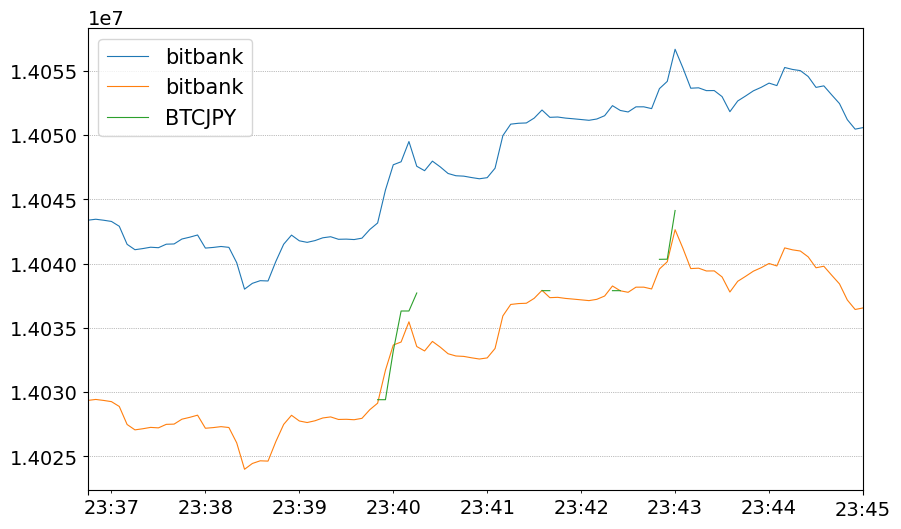

In [30]:
# pricing example
venue == "bitbank"
offset = 5
ask = (dev_ma + offset).div(1e4).add(1).mul(global_mid.values)
bid = (dev_ma - offset).div(1e4).add(1).mul(global_mid.values)
st = 17000
pd.concat([
    ask[venue],
    bid[venue],
    tprice[venue],
], axis=1).iloc[st:st+100].plot()

In [299]:
# concolidate
venue = "bitbank"
offset = 4.3
ask = (dev_ma + offset).div(1e4).add(1).mul(global_mid.values)
bid = (dev_ma - offset).div(1e4).add(1).mul(global_mid.values)
data = pd.concat([
    ask[venue].rename("ask").round(),
    bid[venue].rename("bid").round(),
    mid[venue].rename("mid"),
    exec_price[[f"buy_{venue}", f"sell_{venue}"]].set_axis(["buy", "sell"], axis=1),
    best[venue].BTCJPY.set_axis(["best_bid", "best_ask"], axis=1),
    dev_ma[venue].to_frame("dev_ma"),
    dev_smooth[venue].to_frame("dev_smooth"),
    global_mid.mid.pct_change().rolling(freq).std().mul(np.sqrt(12 * 1440 * 365) * 100).to_frame("vol"),
    np.sign((global_mid.mid - global_mid.mid.rolling(freq).mean())).rename("ma_sign"),
], axis=1)
# data.head(3)

In [300]:
data.vol.describe().to_frame("Volatility").T

,count,mean,std,min,25%,50%,75%,max
Volatility,328318.0,20.678213,13.43876,2.119905,12.225148,17.231923,25.147174,214.531389


In [301]:
# run simulation
pos = 0
exit_spread = None
vol_threshold = 30
horizon = 12 * 60
transactions = []
stop_loss = 30
tp_level = 40
for i, (t, row) in tqdm(enumerate(data.iterrows())):
    if pos != 0:
        # LIMIT EXIT
        if pos > 0:
            price = row.best_ask
            # price = row.mid * (1 + exit_spread / 1e4)
            # price = transactions[-1][-2] * (1 + exit_spread / 1e4)  # Profit target pricing
            if price < row.buy:
                pos = 0
                transactions.append([i, t, -1, price, "limit"])
        elif pos < 0:
            price = row.best_bid
            # price = row.mid * (1 - exit_spread / 1e4)
            # price = transactions[-1][-2] * (1 - exit_spread / 1e4)  # Profit target pricing
            if price > row.sell:
                pos = 0
                transactions.append([i, t, +1, price, "limit"])
        
        # SL
        if pos != 0 and pos * (row.mid / transactions[-1][-2] - 1) * 1e4 < -stop_loss:
            pos = 0
            price = row.best_bid if pos > 0 else row.best_ask
            transactions.append([i, t, pos * -1, price, "market"])
            
        # TP
        price = row.best_bid if pos > 0 else row.best_ask
        if pos != 0 and pos * (price / transactions[-1][-2] - 1) * 1e4 > tp_level:
            pos = 0
            transactions.append([i, t, pos * -1, price, "market"])
        
        # HORIZON
        if pos != 0 and transactions[-1][0] + horizon < i:
            pos = 0
            price = row.best_bid if pos > 0 else row.best_ask
            transactions.append([i, t, pos * -1, price, "market"])
    else:
        # ENTRY
        if row.ask < row.buy and row.vol < vol_threshold and row.dev_ma > 0 and row.ma_sign < 0:
            pos -= 1
            transactions.append([i, t, -1, row.ask, "limit"])
        if row.sell < row.bid and row.vol < vol_threshold and row.dev_ma  < 0 and row.ma_sign > 0:
            pos += 1
            transactions.append([i, t, +1, row.bid, "limit"])
            
# form results table
trs = pd.DataFrame(transactions, columns=["i", "time", "side", "price", "order"])
trs = pd.concat([
    trs.iloc[::2].reset_index(drop=True).rename(lambda x: f"entry_{x}", axis=1),
    trs.iloc[1::2].reset_index(drop=True).rename(lambda x: f"exit_{x}", axis=1),
], axis=1)

trs["fee"] = trs.entry_order.replace({"market": -12, "limit": 2}) + trs.exit_order.replace({"market": -12, "limit": 2})
trs["pl"] = (trs.exit_price/trs.entry_price).sub(1).mul(1e4).mul(trs.entry_side) + trs.fee
trs["duration"] = (trs.exit_time - trs.entry_time).dt.total_seconds()
# if venue == "bitbank"

0it [00:00, ?it/s]

In [302]:
trs.duration.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
duration,315.0,656.460317,802.583464,5.0,95.0,365.0,900.0,3605.0


In [303]:
trs.pl.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
pl,315.0,6.22574,13.395452,-43.696395,1.846812,7.05304,12.703005,44.74634


<Axes: xlabel='entry_time', ylabel='PNL[%]'>

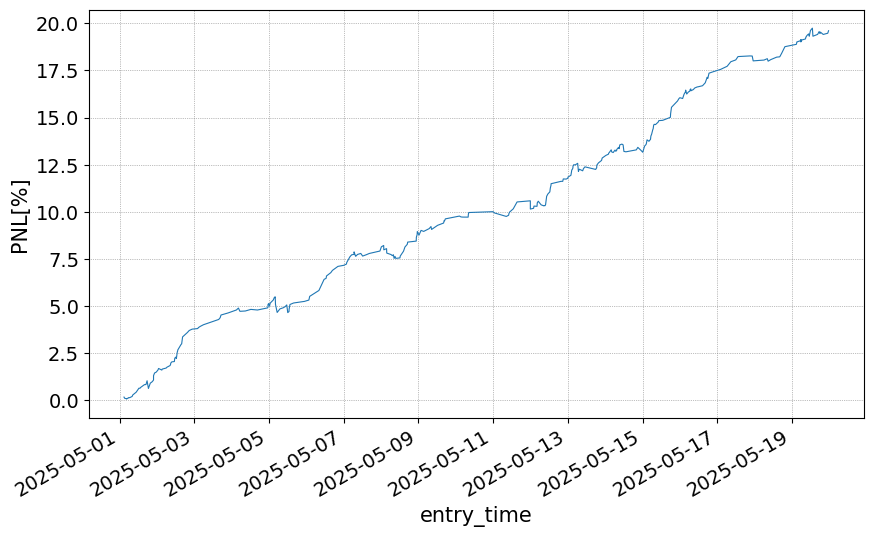

In [304]:
trs.set_index("entry_time").pl.div(100).cumsum().plot(ylabel="PNL[%]")

In [307]:
# summary stats
tmp = trs.set_index("entry_time").pl.resample("1D").sum().div(100).agg(["mean", "std"])
tmp["sharpe"] = tmp["mean"] / tmp["std"] * np.sqrt(365)

In [344]:
trade["term_amount"] = trade.price * trade.amount
vol1s = trade.query("venue == 'bitbank'").set_index("timestamp").groupby("side").resample("1s").term_amount.sum().to_frame("vol").query("vol > 0").div(1e4)
vol1s.groupby("side").describe()

vol                                                                  \
        count       mean         std       min       25%       50%        75%   
side                                                                            
-1    35233.0  78.044223  306.949302  0.133707  1.798257  9.733499  42.981972   
 1    53047.0  57.011172  243.335187  0.133357  0.910411  4.884563  25.961315   

                    
               max  
side                
-1    13653.627325  
 1     9263.100359

<Axes: >

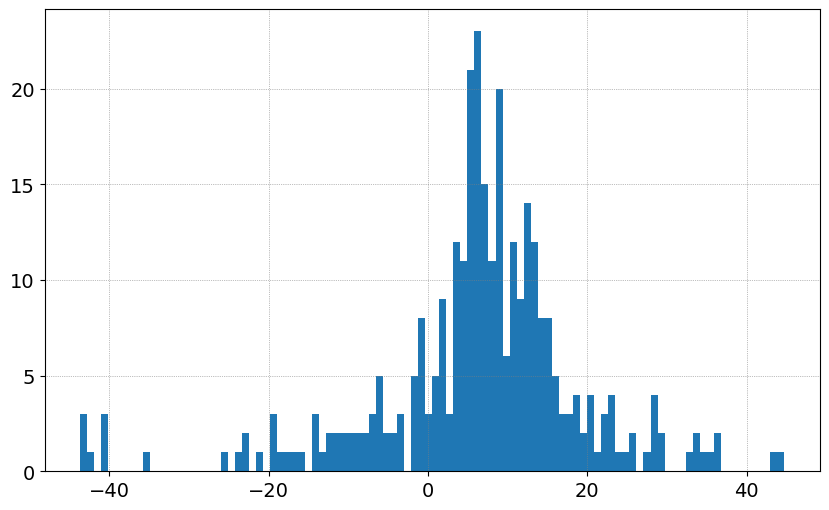

In [306]:
trs.pl.hist(bins=100)

In [268]:
trs.groupby("entry_side").pl.describe()

,count,mean,std,min,25%,50%,75%,max
entry_side,,,,,,,,
-1,230.0,5.628535,13.761460,-45.561253,1.875753,6.694204,12.626105,43.373293
1,36.0,8.482683,12.337349,-19.140618,2.578117,9.858035,14.490151,44.947684


In [269]:
trs.groupby(["entry_order", "exit_order"]).pl.describe()

count       mean        std        min        25%  \
entry_order exit_order                                                      
limit       limit       253.0   7.724005  10.536267 -23.037482   3.576217   
            market       13.0 -27.248741  22.079508 -45.561253 -42.386920   

                              50%        75%        max  
entry_order exit_order                                   
limit       limit        7.252611  13.172157  44.947684  
            market     -40.345881 -16.237995  21.567228

In [270]:
trs.groupby(trs.entry_time.dt.weekday).pl.describe()

,count,mean,std,min,25%,50%,75%,max
entry_time,,,,,,,,
0,56.0,3.034098,16.012638,-42.840067,0.228914,6.410151,11.499125,44.947684
1,31.0,9.340689,14.474037,-45.561253,6.244770,9.413139,13.596850,43.373293
2,31.0,3.031450,12.213001,-36.048743,0.308737,6.015542,10.531539,20.298987
3,57.0,7.392492,11.857317,-40.740357,2.701027,7.156175,14.334419,32.903554
4,47.0,8.736817,12.263801,-19.140618,2.551174,7.127688,13.197447,36.802369
5,20.0,6.694786,10.551309,-25.467694,2.385901,7.661761,13.631589,24.292512
6,24.0,3.358158,15.362341,-43.496023,1.546614,6.198160,10.718526,36.782667


In [271]:
trs.groupby(trs.entry_time.dt.hour).pl.describe().style.bar(subset=["mean"])

,count,mean,std,min,25%,50%,75%,max
entry_time,,,,,,,,
0,9.000000,0.271206,11.245731,-19.140618,-6.489114,5.053577,6.076082,14.123051
1,9.000000,9.059226,15.350310,-22.853235,7.156175,8.650306,9.413139,32.903554
2,16.000000,12.401090,7.415907,3.189822,6.286585,12.302853,16.208428,28.371660
3,18.000000,5.623329,6.315889,-8.384893,3.779892,6.406849,8.998969,15.320848
4,8.000000,-4.111779,17.509362,-40.345881,-8.305620,-1.551957,2.196213,19.047222
5,15.000000,1.514331,14.868587,-42.386920,-1.941817,7.150542,9.770132,17.252626
6,17.000000,2.739165,16.859419,-45.561253,1.833166,4.446084,13.482856,25.037050
7,12.000000,2.908825,11.831069,-23.037482,-1.462375,4.506197,7.127573,19.159507
8,23.000000,2.242465,10.887837,-19.381638,-3.291132,6.003928,7.550274,24.292512


In [773]:
trs.set_index("entry_time").between_time(datetime.time(22), datetime.time(6)).pl.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
pl,179.0,3.575402,6.179219,-24.839519,1.72147,4.903439,6.783383,17.288283


<Axes: xlabel='entry_time', ylabel='PnL%'>

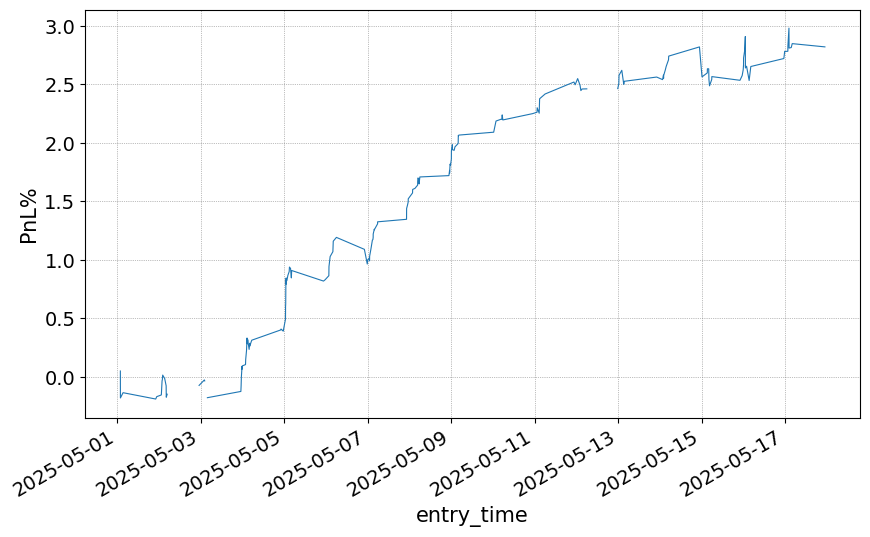

In [774]:
trs.set_index("entry_time").between_time(datetime.time(22), datetime.time(6)).pl.sub(2).cumsum().div(1e2).plot(ylabel="PnL%")

<Axes: ylabel='PnL%'>

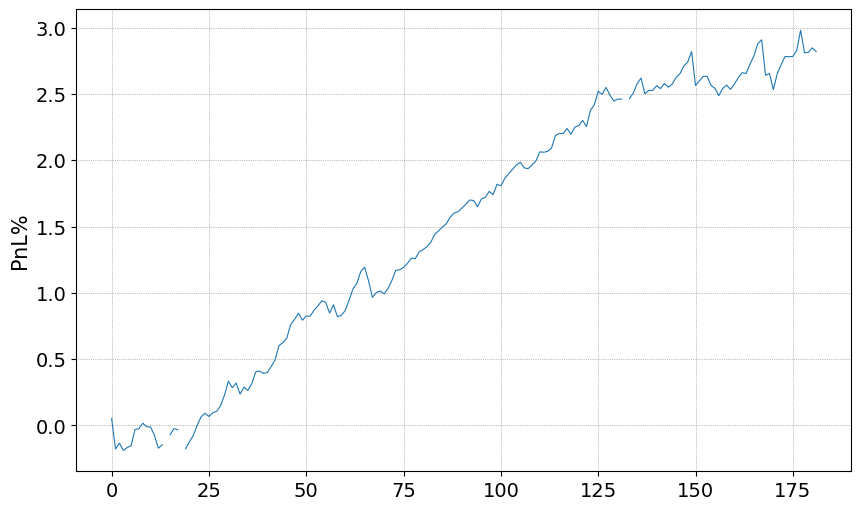

In [775]:
trs.set_index("entry_time").between_time(datetime.time(22), datetime.time(6)).pl.sub(2).cumsum().div(1e2).reset_index(drop=True).plot(ylabel="PnL%")

In [739]:
trs.set_index("entry_time").between_time(datetime.time(0), datetime.time(6)).pl.sub(2).resample("1d").sum().cumsum()

entry_time
2025-05-01 00:00:00+00:00     -2.322954
2025-05-02 00:00:00+00:00     29.418538
2025-05-03 00:00:00+00:00     22.867664
2025-05-04 00:00:00+00:00     67.411195
2025-05-05 00:00:00+00:00    120.280053
2025-05-06 00:00:00+00:00    193.327062
2025-05-07 00:00:00+00:00    246.820760
2025-05-08 00:00:00+00:00    239.147611
2025-05-09 00:00:00+00:00    272.951352
2025-05-10 00:00:00+00:00    291.417586
2025-05-11 00:00:00+00:00    293.167278
2025-05-12 00:00:00+00:00    278.624603
2025-05-13 00:00:00+00:00    307.556012
2025-05-14 00:00:00+00:00    352.183348
2025-05-15 00:00:00+00:00    350.259913
2025-05-16 00:00:00+00:00    337.316086
2025-05-17 00:00:00+00:00    349.658784
Freq: D, Name: pl, dtype: float64

### Coincheck